In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

https://www.youtube.com/watch?v=FHdlXe1bSe4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=25

below based on this

In [14]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bot_relu = input * self.w10 + self.b10
        bot_relu_output = F.relu(input_to_bot_relu)
        scaled_bot_relu_output = bot_relu_output * self.w11
        
        
        input_to_final_relu = scaled_top_relu_output + scaled_bot_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        
        return output

In [15]:
input_values = torch.linspace(start=0, end=1, steps=11)
model = BasicNN()
output_values = model(input_values)

<Axes: >

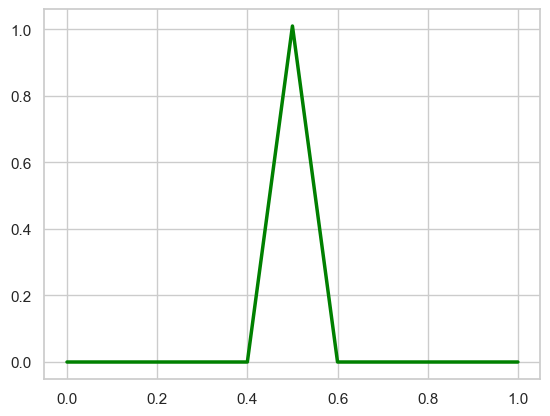

In [16]:
sns.set(style='whitegrid')
sns.lineplot(x=input_values, y=output_values, color='green', linewidth=2.5)